In [1]:
import os
os.chdir(r"C:\DataScienceModels\AttritionUseCase")

In [2]:
#!pip install pandas

In [3]:
#!pip install matplotlib

In [4]:
#!pip install seaborn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('attrition_aggregated.csv',index_col=0)

In [7]:
df.head()

,Skill,Month,Total number of resources,Total attrition
1,.NET,31-01-2018,130,21
2,.NET,28-02-2018,119,5
3,.NET,31-03-2018,121,4
4,.NET,30-04-2018,165,3
5,.NET,31-05-2018,164,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 1 to 624
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Skill                      593 non-null    object
 1   Month                      624 non-null    object
 2   Total number of resources  624 non-null    int64 
 3   Total attrition            624 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 24.4+ KB


In [9]:
df.shape

(624, 4)

In [10]:
df.describe()

,Total number of resources,Total attrition
count,624.000000,624.000000
mean,54.099359,1.838141
std,62.850275,2.697318
min,1.000000,0.000000
25%,8.000000,0.000000
50%,25.000000,1.000000
75%,79.000000,2.000000
max,286.000000,21.000000


In [11]:
df.columns

Index(['Skill', 'Month', 'Total number of resources', 'Total attrition'], dtype='object')

In [12]:
df.isnull().any()

Skill                         True
Month                        False
Total number of resources    False
Total attrition              False
dtype: bool

In [13]:
df[df['Skill'].isnull()]

,Skill,Month,Total number of resources,Total attrition
594,NaN,31-01-2018,1,0
595,NaN,28-02-2018,1,0
596,NaN,31-03-2018,1,0
597,NaN,30-04-2018,6,1
598,NaN,31-05-2018,5,0
599,NaN,30-06-2018,8,2
600,NaN,31-07-2018,8,1
601,NaN,31-08-2018,10,1
602,NaN,30-09-2018,12,0
603,NaN,31-10-2018,15,0


In [14]:
len(df[df['Skill'].isnull()])

31

In [15]:
df_base = df.copy

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(593, 4)

In [18]:
df.isnull().any().sum()

0

In [19]:
df.head()

,Skill,Month,Total number of resources,Total attrition
1,.NET,31-01-2018,130,21
2,.NET,28-02-2018,119,5
3,.NET,31-03-2018,121,4
4,.NET,30-04-2018,165,3
5,.NET,31-05-2018,164,2


In [20]:
df['Skill'].value_counts()

.NET          33
DIGITAL       33
SOA           33
TESTING       33
JAVA          33
SCM/DEVOPS    33
DATA          33
LEGACY        33
BA            33
L1/L2/L3      33
MAINFRAME     33
OTHERS        33
BPM/PEGA      33
AGILE         33
NFT           33
PM            33
ARCHITECT     33
CLOUD         32
Name: Skill, dtype: int64

In [21]:
df['Month'].value_counts()

31-08-2018    18
30-09-2020    18
31-08-2020    18
31-01-2020    18
28-02-2018    18
31-05-2020    18
30-11-2018    18
31-12-2019    18
31-10-2018    18
29-02-2020    18
31-05-2019    18
30-09-2019    18
31-05-2018    18
31-12-2018    18
31-03-2020    18
30-09-2018    18
30-04-2019    18
30-04-2018    18
31-07-2019    18
31-03-2018    18
30-11-2019    18
30-06-2019    18
30-04-2020    18
31-03-2019    18
30-06-2018    18
31-01-2019    18
31-01-2018    18
31-07-2020    18
31-10-2019    18
31-08-2019    18
28-02-2019    18
30-06-2020    18
31-07-2018    17
Name: Month, dtype: int64

<AxesSubplot:>

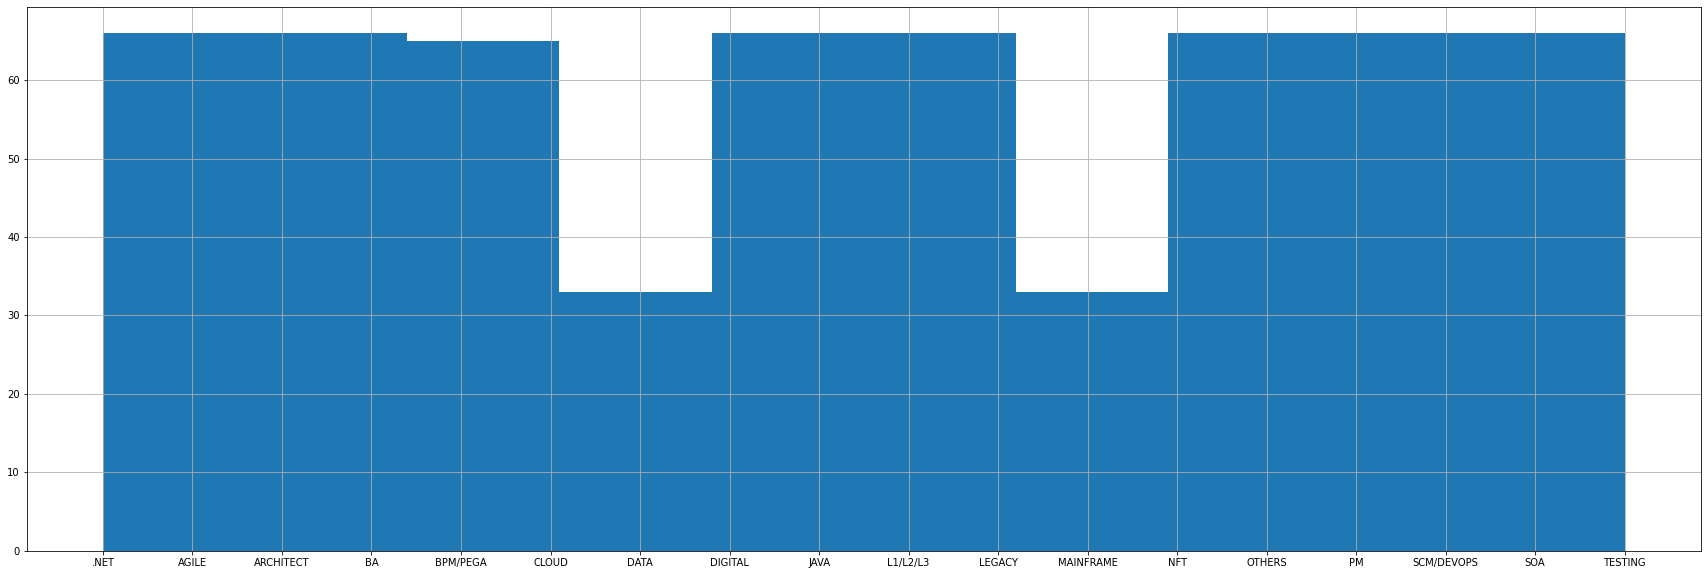

In [34]:
#univariate analysis
#histogram
df['Skill'].hist(figsize=(30,10))

<AxesSubplot:xlabel='Total number of resources'>

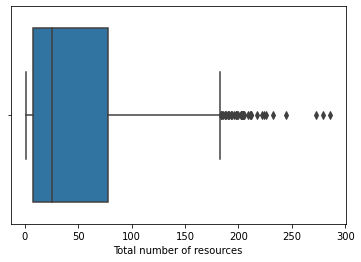

In [35]:
sns.boxplot(x="Total number of resources",data=df)

<AxesSubplot:xlabel='Total attrition'>

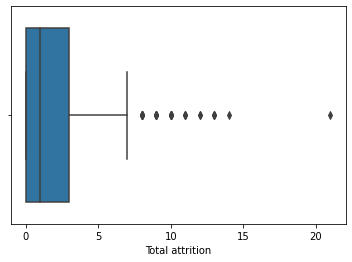

In [36]:
sns.boxplot(x="Total attrition",data=df)

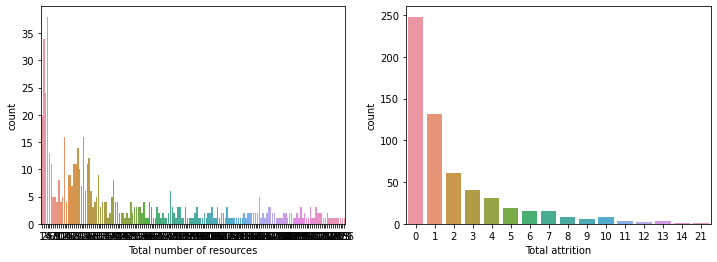

In [37]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Total number of resources", data=df, ax=axes[0])
sns.countplot(x="Total attrition", data=df, ax=axes[1]);

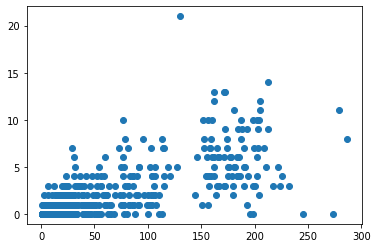

In [38]:
#Multivariate visualization
# Total number of resources vs Total attrition
plt.scatter(df["Total number of resources"], df["Total attrition"]);

C:\Users\dilip-k\Anaconda3\envs\REnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


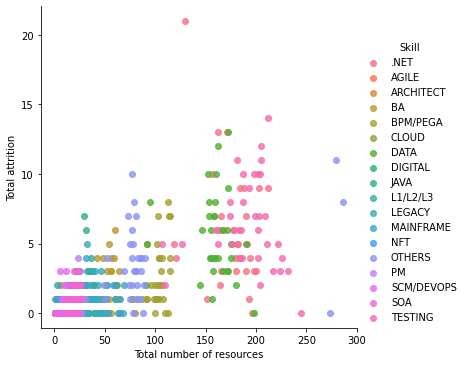

In [39]:
sns.lmplot(
    "Total number of resources", "Total attrition", data=df, hue="Skill", fit_reg=False
);

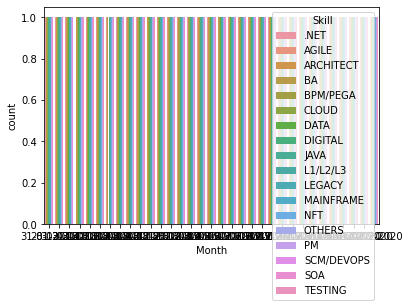

In [40]:
sns.countplot(x="Month", hue="Skill", data=df);

In [41]:
pd.crosstab(df["Skill"], df["Month"]).T

Skill,.NET,AGILE,ARCHITECT,BA,BPM/PEGA,CLOUD,DATA,DIGITAL,JAVA,L1/L2/L3,LEGACY,MAINFRAME,NFT,OTHERS,PM,SCM/DEVOPS,SOA,TESTING
Month,,,,,,,,,,,,,,,,,,
28-02-2018,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
28-02-2019,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
29-02-2020,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30-04-2018,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30-04-2019,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30-04-2020,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30-06-2018,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30-06-2019,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
30-06-2020,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [42]:
pd.crosstab(df["Skill"], df["Total attrition"]).T

Skill,.NET,AGILE,ARCHITECT,BA,BPM/PEGA,CLOUD,DATA,DIGITAL,JAVA,L1/L2/L3,LEGACY,MAINFRAME,NFT,OTHERS,PM,SCM/DEVOPS,SOA,TESTING
Total attrition,,,,,,,,,,,,,,,,,,
0,1,12,30,7,5,25,1,20,10,28,13,14,27,3,18,17,16,1
1,2,13,3,11,11,6,1,8,11,4,8,13,6,5,10,11,9,0
2,1,5,0,5,5,1,3,5,4,1,7,5,0,5,3,3,6,2
3,5,3,0,4,2,0,4,0,5,0,4,0,0,5,1,2,2,3
4,5,0,0,4,4,0,6,0,1,0,0,1,0,6,1,0,0,3
5,4,0,0,1,2,0,3,0,0,0,1,0,0,2,0,0,0,6
6,4,0,0,1,0,0,4,0,1,0,0,0,0,1,0,0,0,4
7,2,0,0,0,3,0,3,0,1,0,0,0,0,2,0,0,0,4
8,0,0,0,0,1,0,3,0,0,0,0,0,0,2,0,0,0,2


<AxesSubplot:xlabel='Skill', ylabel='Total attrition'>

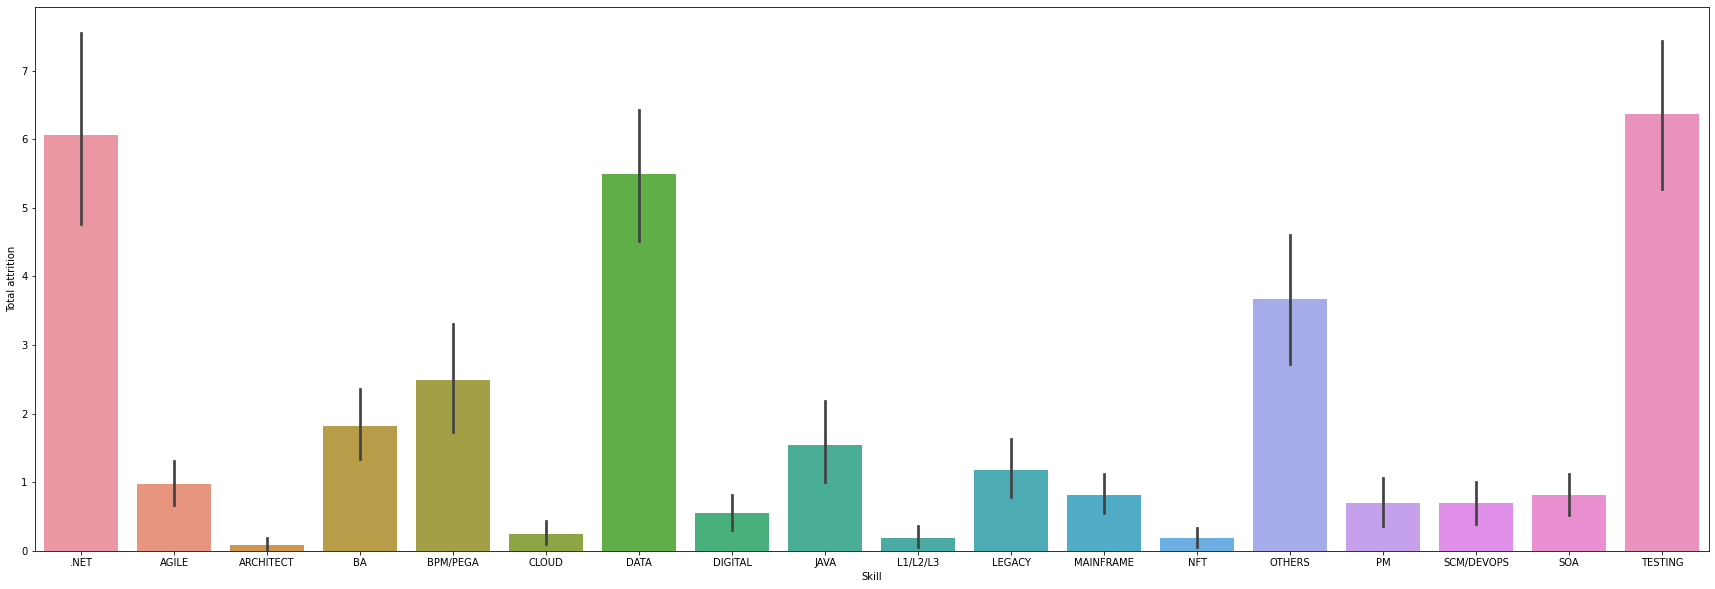

In [45]:
plt.figure(figsize=(30,10))
sns.barplot(x="Skill", y="Total attrition",data=df)

In [22]:
X = df.groupby("Skill")["Total attrition"].sum()

In [23]:
X

Skill
.NET          200
AGILE          32
ARCHITECT       3
BA             60
BPM/PEGA       82
CLOUD           8
DATA          181
DIGITAL        18
JAVA           51
L1/L2/L3        6
LEGACY         39
MAINFRAME      27
NFT             6
OTHERS        121
PM             23
SCM/DEVOPS     23
SOA            27
TESTING       210
Name: Total attrition, dtype: int64

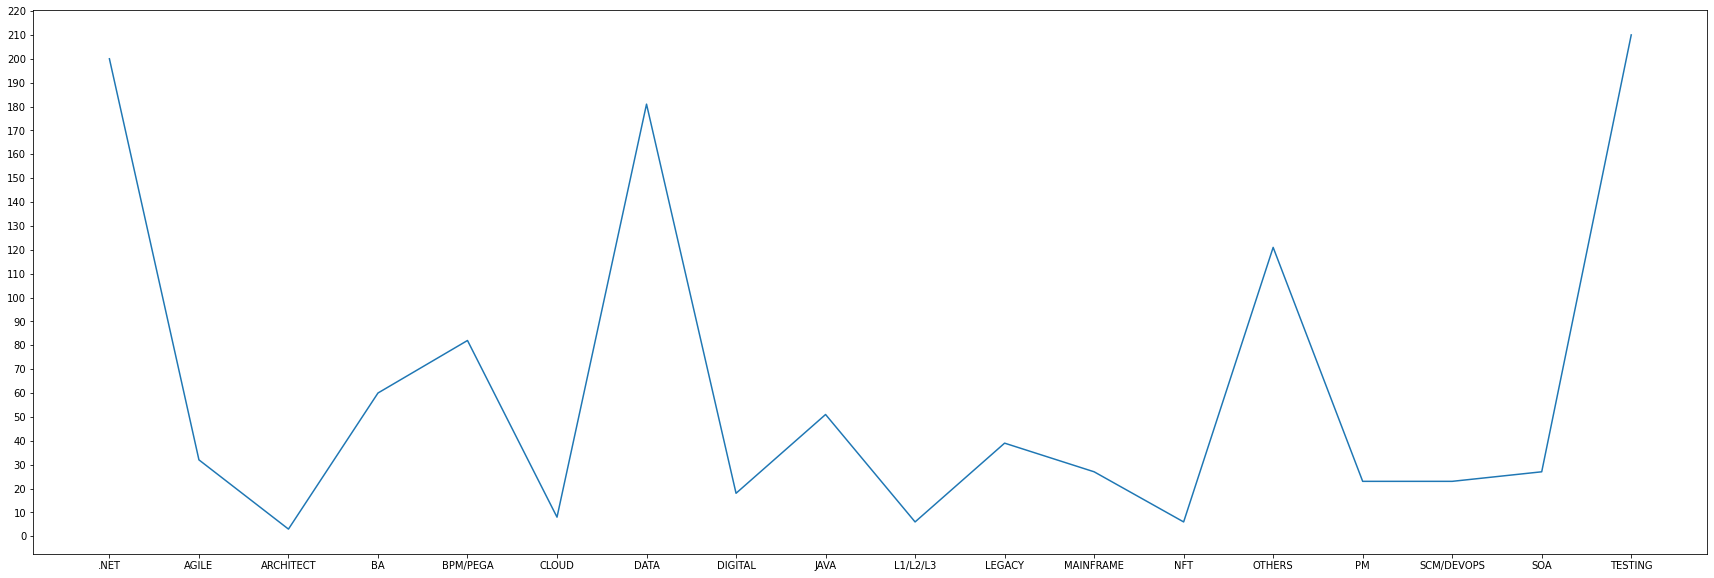

In [24]:
plt.figure(figsize=(30,10))
plt.yticks(np.arange(0,300,10))
plt.plot(X)

In [25]:
Y = df.groupby("Skill")["Total number of resources"].sum()

In [26]:
Y

Skill
.NET          5823
AGILE          667
ARCHITECT       85
BA            1750
BPM/PEGA      3094
CLOUD          101
DATA          5187
DIGITAL        476
JAVA          1068
L1/L2/L3       114
LEGACY        1139
MAINFRAME     1322
NFT            123
OTHERS        3159
PM             735
SCM/DEVOPS     389
SOA            593
TESTING       6307
Name: Total number of resources, dtype: int64

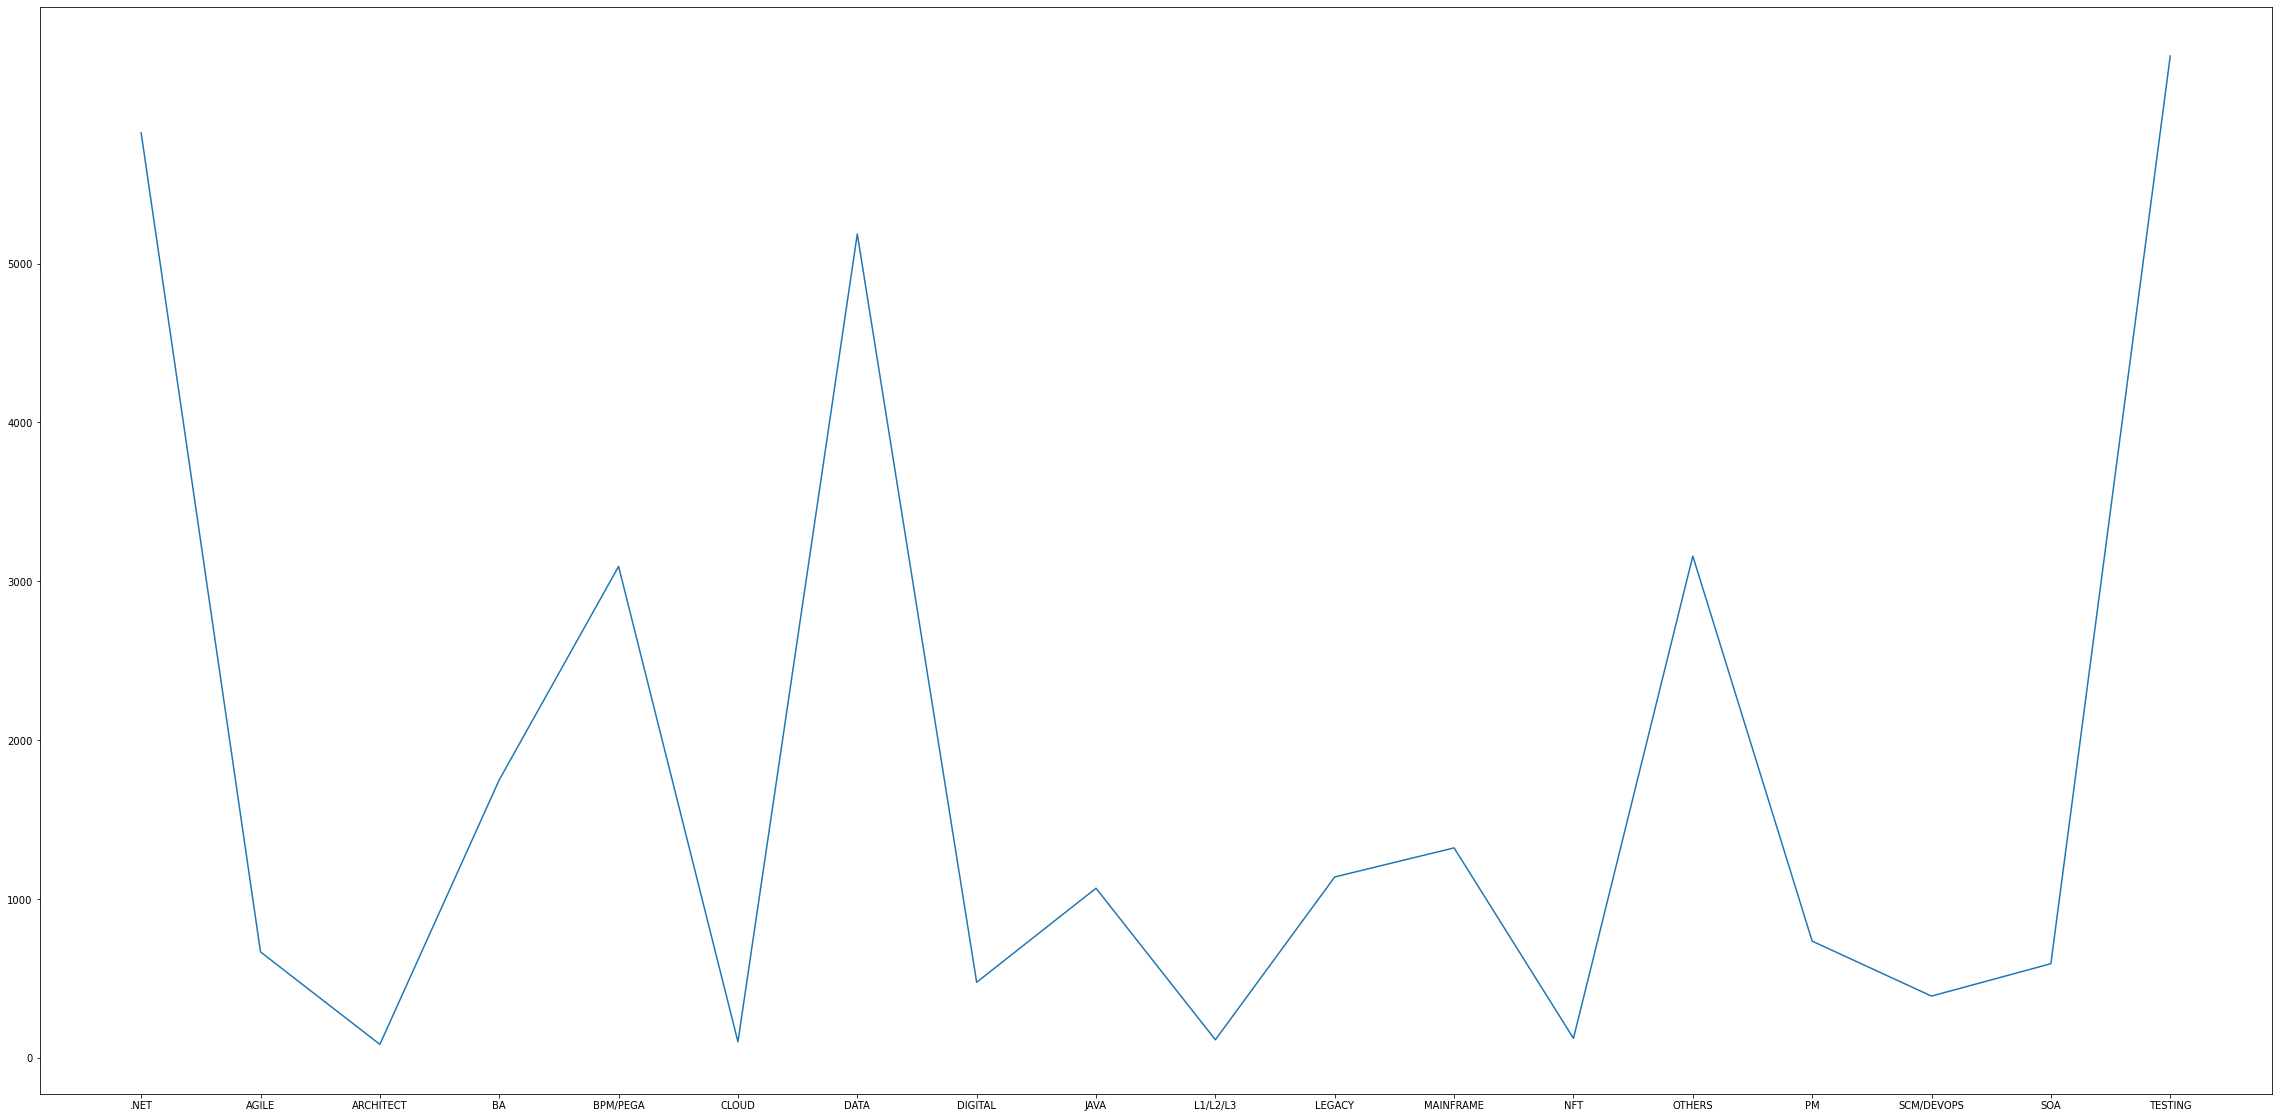

In [27]:
plt.figure(figsize=(40,20))
plt.yticks(np.arange(0,6000,1000))
plt.plot(Y)

In [29]:
df_X = pd.DataFrame(X)

In [30]:
df_X

,Total attrition
Skill,
.NET,200
AGILE,32
ARCHITECT,3
BA,60
BPM/PEGA,82
CLOUD,8
DATA,181
DIGITAL,18
JAVA,51


In [33]:
df_X.loc['TESTING']

Total attrition    210
Name: TESTING, dtype: int64

In [34]:
df.groupby("Skill")["Total attrition"].sum()[0]

200

In [35]:
df.tail()

,Skill,Month,Total number of resources,Total attrition
589,TESTING,31-05-2020,224,3
590,TESTING,30-06-2020,232,3
591,TESTING,31-07-2020,212,14
592,TESTING,31-08-2020,226,4
593,TESTING,30-09-2020,245,0


In [38]:
df.groupby("Skill")["Total number of resources"].sum()

Skill
.NET          5823
AGILE          667
ARCHITECT       85
BA            1750
BPM/PEGA      3094
CLOUD          101
DATA          5187
DIGITAL        476
JAVA          1068
L1/L2/L3       114
LEGACY        1139
MAINFRAME     1322
NFT            123
OTHERS        3159
PM             735
SCM/DEVOPS     389
SOA            593
TESTING       6307
Name: Total number of resources, dtype: int64

In [39]:
X

Skill
.NET          200
AGILE          32
ARCHITECT       3
BA             60
BPM/PEGA       82
CLOUD           8
DATA          181
DIGITAL        18
JAVA           51
L1/L2/L3        6
LEGACY         39
MAINFRAME      27
NFT             6
OTHERS        121
PM             23
SCM/DEVOPS     23
SOA            27
TESTING       210
Name: Total attrition, dtype: int64

In [40]:
type(X)

pandas.core.series.Series

In [41]:
X.index

Index(['.NET', 'AGILE', 'ARCHITECT', 'BA', 'BPM/PEGA', 'CLOUD', 'DATA',
       'DIGITAL', 'JAVA', 'L1/L2/L3', 'LEGACY', 'MAINFRAME', 'NFT', 'OTHERS',
       'PM', 'SCM/DEVOPS', 'SOA', 'TESTING'],
      dtype='object', name='Skill')

In [43]:
df_X = X.add_suffix('_Sum').reset_index()

In [44]:
df_X

,Skill,Total attrition
0,.NET_Sum,200
1,AGILE_Sum,32
2,ARCHITECT_Sum,3
3,BA_Sum,60
4,BPM/PEGA_Sum,82
5,CLOUD_Sum,8
6,DATA_Sum,181
7,DIGITAL_Sum,18
8,JAVA_Sum,51
9,L1/L2/L3_Sum,6


In [50]:
df_summary = df.groupby("Skill")["Total number of resources", "Total attrition"].sum()

<ipython-input-50-a8e375d4fbd7>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_summary = df.groupby("Skill")["Total number of resources", "Total attrition"].sum()


In [51]:
df_summary.add_suffix('_Summary').reset_index() 

,Skill,Total number of resources_Summary,Total attrition_Summary
0,.NET,5823,200
1,AGILE,667,32
2,ARCHITECT,85,3
3,BA,1750,60
4,BPM/PEGA,3094,82
5,CLOUD,101,8
6,DATA,5187,181
7,DIGITAL,476,18
8,JAVA,1068,51
9,L1/L2/L3,114,6


In [52]:
df.head()

,Skill,Month,Total number of resources,Total attrition
1,.NET,31-01-2018,130,21
2,.NET,28-02-2018,119,5
3,.NET,31-03-2018,121,4
4,.NET,30-04-2018,165,3
5,.NET,31-05-2018,164,2


In [55]:
df['dates'] = pd.to_datetime(df['Month'], format='%d-%m-%Y')

In [56]:
df['dates']

1     2018-01-31
2     2018-02-28
3     2018-03-31
4     2018-04-30
5     2018-05-31
         ...    
589   2020-05-31
590   2020-06-30
591   2020-07-31
592   2020-08-31
593   2020-09-30
Name: dates, Length: 593, dtype: datetime64[ns]

In [66]:
df['Month_Year'] = df['dates'].dt.strftime('%b-%Y')

In [67]:
df['Month_Year']

1      Jan-2018
2      Feb-2018
3      Mar-2018
4      Apr-2018
5      May-2018
         ...   
589    May-2020
590    Jun-2020
591    Jul-2020
592    Aug-2020
593    Sep-2020
Name: Month_Year, Length: 593, dtype: object

In [68]:
df_date_summary = df.groupby("Month_Year")["Total number of resources", "Total attrition"].sum()

<ipython-input-68-2fa069c5ac7c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_date_summary = df.groupby("Month_Year")["Total number of resources", "Total attrition"].sum()


In [69]:
df_date_summary

,Total number of resources,Total attrition
Month_Year,,
Apr-2018,847,25
Apr-2019,986,36
Apr-2020,1103,27
Aug-2018,941,36
Aug-2019,993,49
Aug-2020,1340,26
Dec-2018,918,43
Dec-2019,1023,34
Feb-2018,498,15


In [70]:
df_date_summary.reset_index()

,Month_Year,Total number of resources,Total attrition
0,Apr-2018,847,25
1,Apr-2019,986,36
2,Apr-2020,1103,27
3,Aug-2018,941,36
4,Aug-2019,993,49
5,Aug-2020,1340,26
6,Dec-2018,918,43
7,Dec-2019,1023,34
8,Feb-2018,498,15
9,Feb-2019,987,35


In [71]:
df.head()

,Skill,Month,Total number of resources,Total attrition,dates,Month_Year
1,.NET,31-01-2018,130,21,2018-01-31,Jan-2018
2,.NET,28-02-2018,119,5,2018-02-28,Feb-2018
3,.NET,31-03-2018,121,4,2018-03-31,Mar-2018
4,.NET,30-04-2018,165,3,2018-04-30,Apr-2018
5,.NET,31-05-2018,164,2,2018-05-31,May-2018


<AxesSubplot:xlabel='Total number of resources', ylabel='Count'>

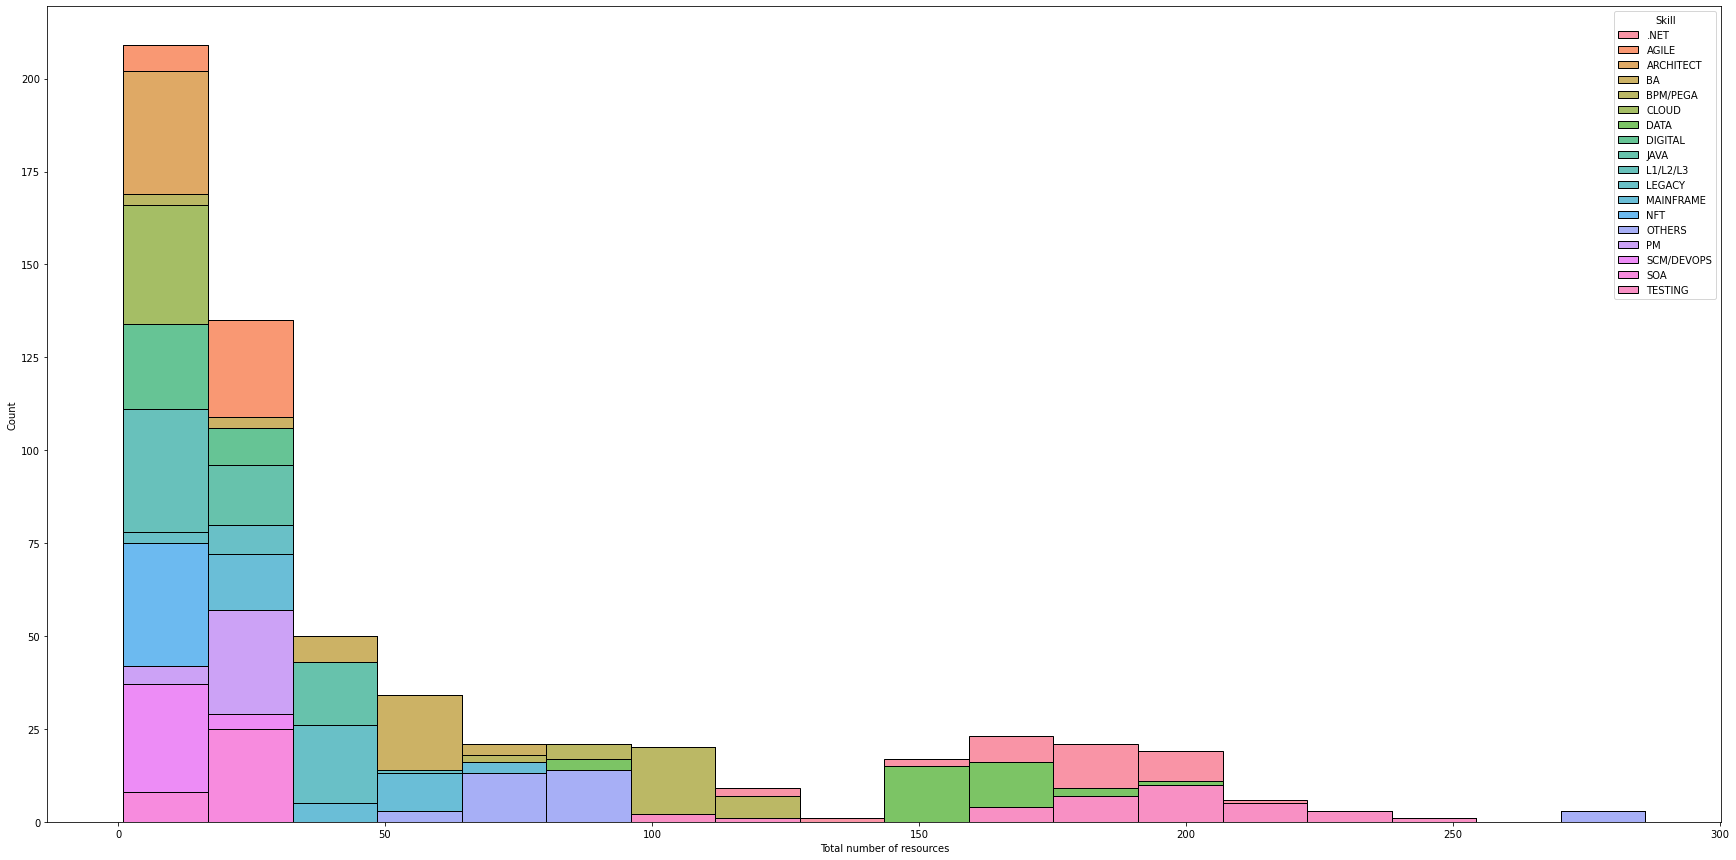

In [73]:
plt.figure(figsize=(30,15))
sns.histplot(data=df, x="Total number of resources", hue="Skill", multiple="stack")

In [74]:
sns.distplot(data=df,x="Total number of resources",hue="Skill",col="Skill")

TypeError: distplot() got an unexpected keyword argument 'data'

In [75]:
df

,Skill,Month,Total number of resources,Total attrition,dates,Month_Year
1,.NET,31-01-2018,130,21,2018-01-31,Jan-2018
2,.NET,28-02-2018,119,5,2018-02-28,Feb-2018
3,.NET,31-03-2018,121,4,2018-03-31,Mar-2018
4,.NET,30-04-2018,165,3,2018-04-30,Apr-2018
5,.NET,31-05-2018,164,2,2018-05-31,May-2018
...,...,...,...,...,...,...
589,TESTING,31-05-2020,224,3,2020-05-31,May-2020
590,TESTING,30-06-2020,232,3,2020-06-30,Jun-2020
591,TESTING,31-07-2020,212,14,2020-07-31,Jul-2020
592,TESTING,31-08-2020,226,4,2020-08-31,Aug-2020
